In [28]:
import pandas as pd
import seaborn as sns
pd.options.display.max_rows = 999

### Reading the csv file using read_csv method

In [7]:
df = pd.read_csv('../Downloads/shootings.csv')

### Creating Year, Month, Day_of_month columns

In [45]:
df['month'] = pd.to_datetime(df.date).dt.month
df['year'] = pd.to_datetime(df.date).dt.year
df['day_of_month'] = pd.to_datetime(df.date).dt.day

### Columns in our dataset

In [9]:
df.columns.values

array(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'], dtype=object)

### Do we have any missing entries?

In [5]:
df.isna().any()
# Prints a list if there is any missing information per column

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
arms_category              False
dtype: bool

In [19]:
df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

### Categorical / Numerical columns

In [24]:
categorical_columns = [
    'name', 'date', 'manner_of_death', 'armed', 'gender', 'race', 'city',
    'state', 'threat_level', 'flee', 'arms_category',  'signs_of_mental_illness',
    'body_camera'
]

numerical_columns = ['id', 'age']

assert set(numerical_columns + categorical_columns) == set(df.columns)

### Analyzing numerical columns

In [27]:
# Id is a a unique identifier for each shooting, analytically useless.

#### Age distribution

<AxesSubplot:xlabel='age'>

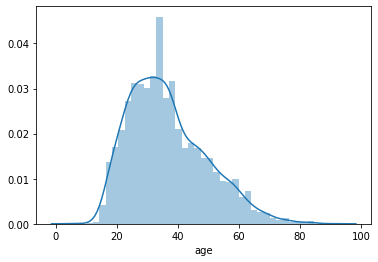

In [29]:
sns.distplot(df['age'])

In [35]:
# Number of shootings per age
df.age.astype(int).value_counts().sort_index()

6       2
12      1
13      1
14      3
15     13
16     30
17     47
18     93
19     82
20     90
21     99
22    113
23    125
24    152
25    176
26    140
27    165
28    150
29    160
30    146
31    174
32    159
33    164
34    159
35    143
36    145
37    222
38    121
39    116
40    104
41    110
42     92
43     78
44     76
45    105
46     83
47     87
48     75
49     73
50     80
51     68
52     54
53     62
54     48
55     49
56     52
57     43
58     49
59     51
60     29
61     31
62     28
63     25
64     20
65     18
66     14
67     13
68     13
69     13
70     11
71      8
72      5
73      4
74      4
75      4
76      8
77      3
78      1
79      1
80      2
81      1
82      2
83      2
84      4
91      1
Name: age, dtype: int64

In [36]:
### Categorical analysis

In [38]:
categorical_columns

['name',
 'date',
 'manner_of_death',
 'armed',
 'gender',
 'race',
 'city',
 'state',
 'threat_level',
 'flee',
 'arms_category',
 'signs_of_mental_illness',
 'body_camera']

In [44]:
for column in categorical_columns:
    print(f'Values repartition for "{column}":')
    print(df[column].value_counts())
    print('\n\n\n')

Values repartition for "name":
TK TK                    29
Michael Ferguson          2
Miguel Mercado Segura     2
Joseph Santos             2
Benjamin Diaz             2
                         ..
Carlumandarlo Zaramo      1
Lawrence Caldwell         1
Robbie Ramirez            1
Wade Allen Baker          1
David McAtee              1
Name: name, Length: 4851, dtype: int64




Values repartition for "date":
2018-04-01    9
2018-06-29    9
2018-01-06    9
2018-02-01    8
2019-06-06    8
             ..
2020-04-23    1
2015-09-08    1
2019-10-05    1
2020-04-01    1
2015-11-26    1
Name: date, Length: 1792, dtype: int64




Values repartition for "manner_of_death":
shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64




Values repartition for "armed":
gun                                 2755
knife                                708
unknown                              418
unarmed                              348
toy weapon                           171

### Aggregation des categories d'une faible frequence

In [59]:
df.armed.value_counts() / df.shape[0]

gun                                 0.562819
knife                               0.144637
unknown                             0.085393
unarmed                             0.071093
toy weapon                          0.034934
vehicle                             0.024515
machete                             0.007967
Taser                               0.004903
sword                               0.004494
ax                                  0.004290
baseball bat                        0.003269
gun and knife                       0.003064
hammer                              0.002860
screwdriver                         0.002451
metal pipe                          0.002451
box cutter                          0.002247
hatchet                             0.002247
sharp object                        0.002247
gun and vehicle                     0.002043
gun and car                         0.001839
scissors                            0.001430
crossbow                            0.001226
rock      